In [132]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get weather data 


## Darksky data

https://darksky.net/

https://github.com/lukaskubis/darkskylib

    pip install darkskylib


In [133]:
# Load the API key for darksky
with open('darksky_key.txt') as f:
    key = f.read()

In [134]:
from darksky import forecast

In [135]:
coords_grenoble = ( 45.166672, 5.71667 ) 

data = forecast(key, *coords_grenoble, units='si', lang='fr' )

In [136]:
type( data )

darksky.forecast.Forecast

In [137]:
data['currently']['temperature']

15.39

In [138]:
len( data['daily']['data'] )

8

In [139]:
T = [ hour.temperature for hour in data.hourly ]

print( len(T) )

49


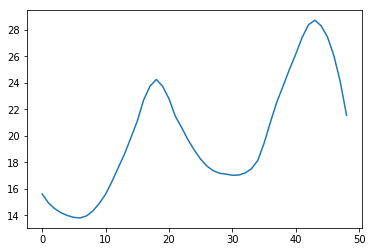

In [140]:
plt.plot( T )

In [141]:
from datetime import datetime as dt

In [150]:
t = dt(2017, 6, 10).isoformat()  # year month day hour ...

In [151]:
exclude = ['currently', 'minutely', 'daily', 'flags']
data = forecast(key, *coords_grenoble, units='si', lang='fr', time=t, exclude=exclude)

In [152]:
records = data['hourly']['data']

In [153]:
records

[{'apparentTemperature': 16.69,
  'cloudCover': 0.91,
  'dewPoint': 12.41,
  'humidity': 0.76,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1018.14,
  'summary': 'Nuageux',
  'temperature': 16.69,
  'time': 1497045600,
  'uvIndex': 0,
  'visibility': 14.47,
  'windBearing': 34,
  'windSpeed': 0.32},
 {'apparentTemperature': 16.06,
  'cloudCover': 0.75,
  'dewPoint': 12.58,
  'humidity': 0.8,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1018.26,
  'summary': 'Nuageux',
  'temperature': 16.06,
  'time': 1497049200,
  'uvIndex': 0,
  'visibility': 14.47,
  'windBearing': 38,
  'windSpeed': 0.57},
 {'apparentTemperature': 15.13,
  'cloudCover': 0.52,
  'dewPoint': 12.13,
  'humidity': 0.82,
  'icon': 'partly-cloudy-night',
  'precipIntensity': 0,
  'precipProbability': 0,
  'pressure': 1018.38,
  'summary': 'Nuages Épars',
  'temperature': 15.13,
  'time': 1497052800,
  'uvIndex': 0,
  '

In [154]:
dropcols = ['icon', 'apparentTemperature', 'ozone', 'summary', 'uvIndex', 'windGust', 'dewPoint',
               'precipProbability', 'visibility', 'pressure', 'humidity', 'precipType']

In [155]:
df = pd.DataFrame.from_records(records, index='time')

df.drop(dropcols, axis=1, level=None, inplace=True, errors='ignore')

In [156]:
len(records)

24

In [100]:
df.index = pd.to_datetime(df.index ,unit='s')

In [101]:
df

,cloudCover,precipIntensity,temperature,windBearing,windSpeed
time,,,,,
2017-06-16 22:00:00,NaN,0,19.65,338,1.30
2017-06-16 23:00:00,NaN,0,18.34,355,3.56
2017-06-17 00:00:00,NaN,0,18.02,12,2.24
2017-06-17 01:00:00,NaN,0,16.92,4,2.87
2017-06-17 02:00:00,NaN,0,16.42,0,1.77
2017-06-17 03:00:00,NaN,0,16.57,358,2.11
2017-06-17 04:00:00,NaN,0,15.44,352,2.11
2017-06-17 05:00:00,NaN,0,16.06,353,1.30
2017-06-17 06:00:00,0.31,0,18.16,356,2.01


In [29]:
T = [ hour.temperature for hour in data.hourly ]

print( len(T) )

24


In [11]:
di = [{'t':45, 'value':4}, {'t':78, 'value':77}]

In [12]:
import pandas as pd

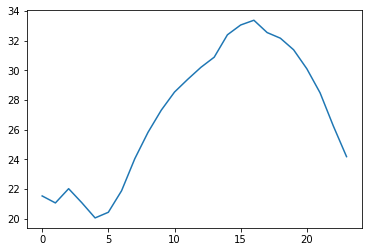

In [14]:
plt.plot( T );

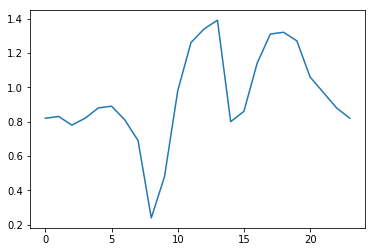

In [15]:
windSpeed = [ hour.windSpeed for hour in data.hourly ]

plt.plot( windSpeed );

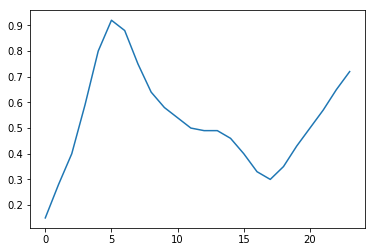

In [16]:
cloudCover = [ hour.cloudCover for hour in data.hourly ]

plt.plot( cloudCover );

In [26]:
data.hourly[4].temperature

20.06

In [27]:
timeindex = pd.to_datetime('today')[ hour.time for hour in data.hourly ]

[1498168800,
 1498172400,
 1498176000,
 1498179600,
 1498183200,
 1498186800,
 1498190400,
 1498194000,
 1498197600,
 1498201200,
 1498204800,
 1498208400,
 1498212000,
 1498215600,
 1498219200,
 1498222800,
 1498226400,
 1498230000,
 1498233600,
 1498237200,
 1498240800,
 1498244400,
 1498248000,
 1498251600]

In [30]:
[ hour['temperature'] for hour in data.hourly ]

[21.54,
 21.07,
 22.03,
 21.08,
 20.06,
 20.44,
 21.89,
 24.05,
 25.83,
 27.32,
 28.54,
 29.4,
 30.21,
 30.89,
 32.4,
 33.06,
 33.38,
 32.55,
 32.17,
 31.39,
 30.11,
 28.49,
 26.26,
 24.19]

In [54]:
import pandas as pd

In [61]:
# voir https://darksky.net/dev/docs/response
datalabels = ['temperature', 'cloudCover', 'precipIntensity', 'windSpeed' , 'windBearing']

In [66]:
def buildDFdaily(day, coords):
    data = forecast(key, *coords, units='si', lang='fr', time=day)
    
    timeindex = pd.to_datetime( [ hour.time for hour in data.hourly ],  unit='s' , origin='unix' )
    
    dailydata = {}
    for label in datalabels:
        dailydata[label] = [ dataeveryhour[label] for dataeveryhour in data.hourly ]
        
    df = pd.DataFrame(dailydata, index=timeindex )
    return df

In [67]:
df = buildDFdaily( t, coords_grenoble )

In [68]:
df

,cloudCover,precipIntensity,temperature,windBearing,windSpeed
2017-06-22 22:00:00,0.15,0.0000,21.54,145,0.82
2017-06-22 23:00:00,0.28,0.0000,21.07,134,0.83
2017-06-23 00:00:00,0.40,0.0000,22.03,108,0.78
2017-06-23 01:00:00,0.59,0.0000,21.08,105,0.82
2017-06-23 02:00:00,0.80,0.0000,20.06,106,0.88
2017-06-23 03:00:00,0.92,0.0000,20.44,108,0.89
2017-06-23 04:00:00,0.88,0.0000,21.89,113,0.81
2017-06-23 05:00:00,0.75,0.0000,24.05,119,0.69
2017-06-23 06:00:00,0.64,0.0000,25.83,165,0.24
2017-06-23 07:00:00,0.58,0.0000,27.32,95,0.48


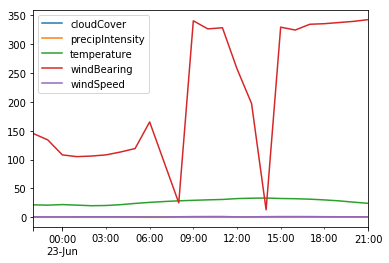

In [60]:
df.plot()

# Debug

In [174]:
import weatherfeed as wf

In [232]:
coords_grenoble = (45.1973288, 5.7139923) #(45.1973288, 5.7103223)

startday, lastday = pd.to_datetime('10/06/2017', format='%d/%m/%Y'), pd.to_datetime('now')
#pd.to_datetime('01/07/2017', format='%d/%m/%Y')

In [233]:
EXCLUDE = [] #[ 'minutely', 'daily', 'flags']  # from the query

COL2DROP = ['icon', 'apparentTemperature', 'ozone', 'uvIndex', 'windGust', 'dewPoint',
               'precipProbability', 'visibility', 'pressure', 'humidity', 'precipType']

coords = coords_grenoble

In [234]:
daterange = pd.date_range(start=startday, end=lastday,  freq='D', normalize=True)
daterange

DatetimeIndex(['2017-06-10', '2017-06-11', '2017-06-12', '2017-06-13',
               '2017-06-14', '2017-06-15', '2017-06-16', '2017-06-17',
               '2017-06-18', '2017-06-19', '2017-06-20', '2017-06-21',
               '2017-06-22', '2017-06-23', '2017-06-24', '2017-06-25',
               '2017-06-26', '2017-06-27', '2017-06-28', '2017-06-29',
               '2017-06-30', '2017-07-01'],
              dtype='datetime64[ns]', freq='D')

In [235]:


records = []
for day in daterange:

    day_iso = day.isoformat()

    print('%i, '%day.day, end='')

    data = forecast(KEY, *coords, units='si', lang='fr', \
         time=day_iso)
    records_oftheday = data['hourly']['data']
    records.extend( records_oftheday )

10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 1, 

In [236]:
# build DF:
allweatherdata = pd.DataFrame.from_records(records, index='time')
allweatherdata.drop(COL2DROP, axis=1, inplace=True, errors='ignore')

allweatherdata.index = pd.to_datetime(allweatherdata.index ,unit='s')

allweatherdata['cloudCover'] = allweatherdata['cloudCover'].fillna( 0 )

In [237]:
allweatherdata.isnull().sum()

cloudCover         0
precipIntensity    0
summary            0
temperature        0
windBearing        0
windSpeed          0
dtype: int64

In [240]:
allweatherdata.duplicated()

time
2017-06-09 22:00:00    False
2017-06-09 23:00:00    False
2017-06-10 00:00:00    False
2017-06-10 01:00:00    False
2017-06-10 02:00:00    False
2017-06-10 03:00:00    False
2017-06-10 04:00:00    False
2017-06-10 05:00:00    False
2017-06-10 06:00:00    False
2017-06-10 07:00:00    False
2017-06-10 08:00:00    False
2017-06-10 09:00:00    False
2017-06-10 10:00:00    False
2017-06-10 11:00:00    False
2017-06-10 12:00:00    False
2017-06-10 13:00:00    False
2017-06-10 14:00:00    False
2017-06-10 15:00:00    False
2017-06-10 16:00:00    False
2017-06-10 17:00:00    False
2017-06-10 18:00:00    False
2017-06-10 19:00:00    False
2017-06-10 20:00:00    False
2017-06-10 21:00:00    False
2017-06-10 22:00:00    False
2017-06-10 23:00:00    False
2017-06-11 00:00:00    False
2017-06-11 01:00:00    False
2017-06-11 02:00:00    False
2017-06-11 03:00:00    False
                       ...  
2017-06-30 16:00:00    False
2017-06-30 17:00:00    False
2017-06-30 18:00:00    False
2017-06-3

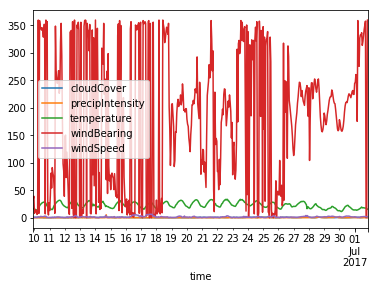

In [239]:
allweatherdata.plot( )

In [164]:
data

TypeError: __repr__ returned non-string (type dict)